In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
import json

# Loading up the data

In [2]:
with open() as json_data:
    data = json.load(json_data)

In [ ]:
data['messages']

## Calculating the Average Number of Messages per Day

In [4]:
len(data["messages"])/(365*2)

153.8082191780822

# Loading the Messages into a Dataframe

In [5]:
dataframe = pd.DataFrame(data["messages"])

### Some Preliminary Stuff

In [7]:
len(dataframe[dataframe["sender_name"]=="Pavi Subenderan"])

5947

In [8]:
len(dataframe[dataframe["sender_name"]=="Rogges Anandarajah"])

39040

In [9]:
set(dataframe["sender_name"].values)

{'Ali Javed',
 'Ali Nawed',
 'Aushvin Vasanthakumaran',
 'Diahanna Rose',
 'Farhin Chowdhury',
 'Hamza Ahsan',
 'Harris Ismael',
 'Janusshan Paramasivam',
 'Joey Bot',
 'Kishan Baskaran',
 'Pavi Subenderan',
 'Rogges Anandarajah',
 'Saad Daas',
 'Sabil Ahmed',
 'Thannoj Thavalingam',
 'Vinoth Maruthalingam'}

### Amount of Messages per Person

person_message_amount2 was added in later as the length of several group member names interfered with creating simple graphics

In [40]:
person_message_amount = {person: len(dataframe[dataframe["sender_name"] == person]) for person in
                        set(dataframe["sender_name"].values)}

persons = {"Ali Javed": "Javed", "Ali Nawed": "Nawed", "Aushvin Vasanthakumaran": "AV",
           "Janusshan Paramasivam": "Janu", "Pavi Subenderan": "Pavi", "Kishan Baskaran": "Kishan",
           "Hamza Ahsan": "Hamza", "Saad Daas": "Saad", "Thannoj Thavalingam": "Thannoj",
           "Diahanna Rose": "Diahanna", "Harris Ismael": "Harris", "Farhin Chowdhury": "Farhin",
           "Joey Bot": "Joey", "Sabil Ahmed": "Sabil", "Vinoth Maruthalingam": "Vinoth", 
           "Rogges Anandarajah": "Rogges"}

person_message_amount2 = {persons[person]: len(dataframe[dataframe["sender_name"] == person]) for person in
                        set(dataframe["sender_name"].values)}

In [41]:
person_message_amount2

{'AV': 7862,
 'Diahanna': 831,
 'Farhin': 1,
 'Hamza': 6514,
 'Harris': 3087,
 'Janu': 6792,
 'Javed': 14864,
 'Joey': 307,
 'Kishan': 7088,
 'Nawed': 3184,
 'Pavi': 5947,
 'Rogges': 39039,
 'Saad': 15956,
 'Sabil': 71,
 'Thannoj': 710,
 'Vinoth': 26}

Average message length in characters. For one member first, then generalizing for entire convo.

In [12]:
rogges = dataframe[dataframe["sender_name"] == "Rogges Anandarajah"]
rogges_msgs = list(rogges['content'].values)
rogges_msgs = [len(str(message)) for message in rogges_msgs]
sum(rogges_msgs)/person_message_amount["Rogges Anandarajah"]

34.91234631147541

In [13]:
person_avg_characters = {}

names = set(dataframe['sender_name'].values)

for person in names:
    person_frame = dataframe[dataframe['sender_name'] == person]
    person_msgs = list(person_frame['content'].values)
    person_msgs = [len(str(message)) for message in person_msgs]
    avg_length = sum(person_msgs)/person_message_amount[person]
    person_avg_characters[person] = avg_length

In [14]:
person_avg_characters

{'Ali Javed': 20.599300322927878,
 'Ali Nawed': 32.8125,
 'Aushvin Vasanthakumaran': 14.78987534978377,
 'Diahanna Rose': 30.477737665463298,
 'Farhin Chowdhury': 32.0,
 'Hamza Ahsan': 19.46346330979429,
 'Harris Ismael': 34.47586653709103,
 'Janusshan Paramasivam': 20.750883392226147,
 'Joey Bot': 91.56677524429968,
 'Kishan Baskaran': 49.784988713318285,
 'Pavi Subenderan': 30.822767782074997,
 'Rogges Anandarajah': 34.91234631147541,
 'Saad Daas': 23.44303083479569,
 'Sabil Ahmed': 23.239436619718308,
 'Thannoj Thavalingam': 36.69718309859155,
 'Vinoth Maruthalingam': 18.5}

Let's try a scatter plot for avg amount of characters.
Avg amount of characters being an indicator for message length and presumed quality.

## Working with Dates and Times

In [15]:
import time as tm

Preliminary work to turn epoch time to normal dates.

In [16]:
tm.strftime('%Y-%m-%d', tm.localtime(dataframe.iloc[0]['timestamp']))

'2018-07-12'

Renaming the time column to epoch time

In [17]:
dataframe.columns = ['audio_files', 'content', 'files', 'gifs', 'photos', 'plan',
       'reactions', 'sender_name', 'share', 'sticker', 'epoch time', 'type',
       'videos']

Preliminary work to apply to apply to a function to convert epoch to regular time

In [18]:
tm_obj = dataframe["epoch time"].apply(func = tm.localtime).iloc[0]
[tm_obj.tm_year, tm_obj.tm_mon, tm_obj.tm_mday]
tm_obj

time.struct_time(tm_year=2018, tm_mon=7, tm_mday=12, tm_hour=23, tm_min=11, tm_sec=8, tm_wday=3, tm_yday=193, tm_isdst=1)

Dummy column holds the time object with all the time information; all of which is not necessary. time_converter pulls out the date while take_hour takes the hour of the day the message was sent at. Those are saved as two separate columns for two different metrics. take_day finally is for which day of the week the message was sent.

In [19]:
dataframe["dummy column"] = dataframe["epoch time"].apply(func = tm.localtime)

def time_converter(time_object):
    return "%d-%d-%d" % (time_object.tm_year, time_object.tm_mon, time_object.tm_mday)

dataframe["datetime"] = dataframe["dummy column"].apply(func = time_converter)

def take_hour(time_object):
    return "%d" % (time_object.tm_hour)

dataframe["hour"] = dataframe["dummy column"].apply(func = take_hour)

def take_day(time_object):
    days = {0: "Mon", 1: "Tues", 2: "Wed", 3: "Thurs", 4: "Fri", 5: "Sat", 6: "Sun"}
    return "%s" % (days[time_object.tm_wday])

dataframe["day"] = dataframe["dummy column"].apply(func = take_day)

dataframe = dataframe.drop(labels = 'dummy column', axis = 1)

Counting up the messages by date and hour. Uses the operator library to sort by message quantity in descending order.

In [20]:
msgs_by_date = {date: len(dataframe[dataframe["datetime"] == date]) for date in
                        set(dataframe["datetime"].values)}

In [21]:
import operator as op

sorted_msgs_date = sorted(msgs_by_date.items(), key=op.itemgetter(1))

In [22]:
msgs_count_day = np.array(list(msgs_by_date.values()))

In [24]:
msgs_by_hour = {int(hour): len(dataframe[dataframe["hour"] == hour]) for hour in 
               set(dataframe["hour"].values)}

msgs_by_hour

{0: 9860,
 1: 3554,
 2: 660,
 3: 223,
 4: 57,
 5: 33,
 6: 56,
 7: 161,
 8: 677,
 9: 1697,
 10: 2953,
 11: 3985,
 12: 6341,
 13: 6226,
 14: 5462,
 15: 5647,
 16: 5515,
 17: 5120,
 18: 5481,
 19: 5424,
 20: 7082,
 21: 9369,
 22: 13682,
 23: 13015}

Simple plotting of messages by hour; final visuals to come later on.

In [25]:
import matplotlib.pyplot as plt

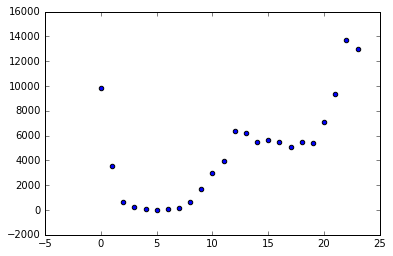

In [26]:
plt.scatter(list(msgs_by_hour.keys()), list(msgs_by_hour.values()))
plt.show()

## Analyzing Word Content

splitter splits the messages by spaces. word_counter removes punctuation and uses a dictionary to manually handle exceptions where words are spelled with multiple letters. E.g. looool == loool == lol

There were other exceptions obviously but they were not considered. Many words of interest appear several hundred to several thousand times. Handling exceptions that would amount to only 1-50 times which is at most a 5% change. All words that have various spellings amounting to 70 or more have been accounted for.

Lastly, we abuse the apply method on dataframes to get information that we want. It's normally used to apply a function to a column and return the modified column. In this case we use apply to operate on the column's data simultaneously and put the output into a different data structure. As such, the apply operation returns a None column as the function does nothing to the column itself. 

In [ ]:
def splitter(string):
    string = str(string)
    return (string.split(' '))

dataframe['content by words'] = dataframe['content'].apply(func = splitter)

import string
word_counts = {}

def word_counter(word_list):
    for word in word_list:
        word = word.lower()
        word = ''.join([char for char in word if char not in string.punctuation])
        multi_letter_exceptions = {'loool': 'lol', 'lmaooo': 'lmao', 'looool': "lol",
                                  'lmaoooo': "lmao", 'yeahhh': 'yeah', 'ohhh': "oh",
                                  'yeee': "ye"}
        if word in multi_letter_exceptions:
            word = multi_letter_exceptions[word]
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

dataframe['content by words'].apply(func = word_counter)

Sorting the word counts; descending order as with the time data previously.

In [ ]:
sorted_word_counts = sorted(word_counts.items(), key=op.itemgetter(1))

sorted_word_counts[::-1]

Regex to find instances of words where a letter is repeated consecutively 3 or more times. According to the Oxford Dictionary, aside from hyphenated words, three consecutively repeated letters don't occur naturally. This work is used to obtain the results above. Single test case follows and then the generalized method for all data. .apply method is abused again for the general form.

In [2]:
import re

s = 'loool'
if re.findall(r'((\w)\2{2,})', s): 
    print("hello")

hello


In [ ]:
repeated_letters = {}

def repeat(word_list):
    for word in word_list:
        word = word.lower()
        if re.findall(r'((\w)\2{2,})', word):
            if word in repeated_letters:
                repeated_letters[word] += 1
            else:
                repeated_letters[word] = 1

dataframe['content by words'].apply(func = repeat)

Sorting the words with repeated letters in descending order.

In [ ]:
sorted_letter_repeats = sorted(repeated_letters.items(), key=op.itemgetter(1))

sorted_letter_repeats[::-1]

Cleaning up the original dataframe; should have been done earlier but it's not a big deal. Next, preliminary dictionaries are being made with days of the week and date data to feed into seaborn. 

### The first line with dataframe.drop can only be run once. Once run, comment it out if you wish to run this cell more than once. Otherwise the cell will stop at the first line's error. 

In [32]:
dataframe = dataframe.drop(labels = ['audio_files', 'files', 'gifs', 'plan', 'reactions', 'share',
                                     'sticker', 'type', 'videos'], axis = 1)

days_of_the_week = {date: dataframe[dataframe.datetime == date].day.iloc[0] 
                    for date in set(dataframe.datetime.values)}

messages_per_day = {date: len(dataframe[dataframe.datetime == date]) for date in
                   set(dataframe.datetime.values)}

sorted(messages_per_day.items(), key=op.itemgetter(1))[::-1]

[('2016-8-15', 1811),
 ('2016-12-2', 1285),
 ('2017-2-10', 1090),
 ('2016-7-11', 924),
 ('2018-6-7', 856),
 ('2016-10-15', 778),
 ('2018-2-27', 774),
 ('2016-11-20', 734),
 ('2016-7-4', 728),
 ('2017-12-5', 691),
 ('2016-8-17', 690),
 ('2016-10-27', 634),
 ('2016-8-23', 600),
 ('2016-10-23', 577),
 ('2016-10-18', 574),
 ('2016-8-27', 573),
 ('2016-10-13', 571),
 ('2016-7-10', 555),
 ('2016-8-22', 553),
 ('2016-7-18', 530),
 ('2016-8-18', 510),
 ('2016-10-24', 502),
 ('2016-10-28', 489),
 ('2016-10-19', 486),
 ('2016-8-14', 479),
 ('2016-11-9', 466),
 ('2016-7-9', 464),
 ('2016-10-25', 459),
 ('2016-8-21', 442),
 ('2016-9-1', 441),
 ('2016-7-6', 431),
 ('2016-11-27', 431),
 ('2018-1-29', 426),
 ('2017-6-5', 418),
 ('2016-8-16', 415),
 ('2017-2-23', 415),
 ('2016-8-28', 409),
 ('2016-12-13', 408),
 ('2016-12-1', 408),
 ('2018-1-2', 405),
 ('2018-2-4', 389),
 ('2017-3-8', 387),
 ('2017-12-21', 386),
 ('2016-10-30', 385),
 ('2016-11-8', 382),
 ('2016-7-12', 381),
 ('2016-10-20', 378),
 ('2

Merging the previous two dictionaries to make a single dictionary to convert into a dataframe. Following that, the dataframe is made and named appropriately. 

In [33]:
dict_for_daily_messages = {date: (messages_per_day[date], days_of_the_week[date])
                           for date in messages_per_day.keys()}

daily_messages_dataframe = pd.DataFrame.from_dict(dict_for_daily_messages, orient = 'index')
daily_messages_dataframe.rename(columns = {daily_messages_dataframe.columns[0]: "Number of Messages",
                                          daily_messages_dataframe.columns[1]: "Day of the Week"},
                             inplace = True)

Simple calculations to see how many messages were sent on each weekday. 

In [34]:
messages_by_day = {day: sum(daily_messages_dataframe[daily_messages_dataframe["Day of the Week"] == day]
                           ["Number of Messages"].values) for day in ["Mon", "Tues", "Wed", "Thurs", 
                                                                     "Fri", "Sat", "Sun"]}
messages_by_day

{'Fri': 15410,
 'Mon': 17623,
 'Sat': 12774,
 'Sun': 16839,
 'Thurs': 16805,
 'Tues': 19117,
 'Wed': 13712}

### Preliminary work on calculating average response time and how long it takes to initiate contact per user.

Epoch time can used in arithmetic

In [35]:
dataframe['epoch time'].iloc[0]-dataframe['epoch time'].iloc[112279]

64116151

Single user conversion. Calculates time difference across two consecutive rows. Filter amount is set to 200 seconds because preliminary research suggests conversation lengths usually range between 2.5 minutes and 4 minutes. 3 minutes and 20 seconds seemed like a reasonable filter to apply. 

This particular method is to see how long it takes to initiate contact from a user's last message. Only the user's messages are considered so that participation in conversations started by others is excluded.

In [36]:
rogges0 = dataframe[dataframe["sender_name"] == "Rogges Anandarajah"]
rogges0['dtime'] = rogges0['epoch time'] - rogges0['epoch time'].shift(-1)
rogges0 = rogges0.drop(rogges0.index[len(rogges0)-1])

#rogges0[rogges0["dtime"] > 300]['dtime']

response_times = rogges0.loc[rogges0['dtime'] > 200, 'dtime']
np.mean(response_times)

C:\Users\rogge\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


9396.179308297462

Users who aren't active in the group are removed at this stage; the goal of the analysis at this point is to determine who any given user should message to get a prompt response. Generalized method to find time to intiate contact.

In [65]:
average_response_time = {}

names.remove('Joey Bot')
names.remove("Diahanna Rose")
names.remove("Farhin Chowdhury")
names.remove("Sabil Ahmed")
names.remove("Vinoth Maruthalingam")

for name in names:
    named_frame = dataframe[dataframe['sender_name'] == name]
    named_frame['dtime'] = named_frame['epoch time'] - named_frame['epoch time'].shift(-1)
    named_frame = named_frame.drop(named_frame.index[len(named_frame)-1])
    response_times = named_frame.loc[named_frame['dtime'] > 200, 'dtime']
    average_response_time[name] = np.mean(response_times)/3600

average_response_time2 = {persons[person]: average_response_time[person] for person in
                          names}

average_response_time2

C:\Users\rogge\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'AV': 10.758429571303587,
 'Hamza': 10.495621880745995,
 'Harris': 15.933941203229843,
 'Janu': 9.93098309719115,
 'Javed': 5.1693127289822645,
 'Kishan': 7.735491134492669,
 'Nawed': 15.597880477308292,
 'Pavi': 11.04130177003388,
 'Rogges': 2.610049807860406,
 'Saad': 5.82753290556104,
 'Thannoj': 71.68702755009107}

The following is used to measure how long it takes for someone to follow up to any concluded conversation that occured at least 200 seconds ago. This is a better indicator of general activity levels. Naming convention for the relevant dictionaries is, admittedly, not ideal.

In [67]:
average_response_time3 = {}

dataframe['dtime'] = dataframe['epoch time'] - dataframe['epoch time'].shift(-1)
dataframe = dataframe.drop(dataframe.index[len(dataframe)-1])

dataframe2 = dataframe[dataframe['dtime'] > 200]

for name in names:
    named_frame2 = dataframe2[dataframe2['sender_name'] == name]
    response_times2 = named_frame2['dtime']
    average_response_time3[name] = (np.mean(response_times2)/60)/60

average_response_time3

average_response_time4 = {persons[person]: average_response_time3[person] for person in
                          names}

average_response_time4
#dataframe2[dataframe2['sender_name'] == "Pavi Subenderan"]

{'AV': 0.8947756721736314,
 'Hamza': 0.7114489568682606,
 'Harris': 1.5058988095238095,
 'Janu': 1.0218573284426105,
 'Javed': 1.2514107229500242,
 'Kishan': 0.9773244411202526,
 'Nawed': 1.3978254617014836,
 'Pavi': 1.2551622388266224,
 'Rogges': 2.0127993236714974,
 'Saad': 1.334587700908456,
 'Thannoj': 1.608358175248419}

# Visuals

### For plots, plt.plot() and plt.savefig() are mutually exclusive. Leave one active and comment the other out. I recommend leaving plt.savefig commented out until you're sure you have a final product worth saving

## Amount of Messages by Person

Seaborn was chosen as the graphics package instead of matplotlib. Seaborn's default colour scheme and settings are nice and simple. Plus, any other tweaks such as x-axis label can be easily handled with matplotlib commands anyways.

In [59]:
import seaborn as sns

sorted_person_messages = sorted(person_message_amount2.items(), key=op.itemgetter(1))

plt.figure(figsize=(20,10), dpi = 120)

sns.barplot(x = [person[0] for person in sorted_person_messages],
            y = [person[1] for person in sorted_person_messages])

plt.title("Total Messages July 2016 - July 2018", size = 35)
plt.ylabel("Number of Messages", size = 25)

plt.yticks(size = 20)
plt.xticks(size = 17.5)

plt.show()


Code block below is to save an image of the data table with message counts. The 3 digit number as the first argument of subplot adjusts the position of the table in the figure. 

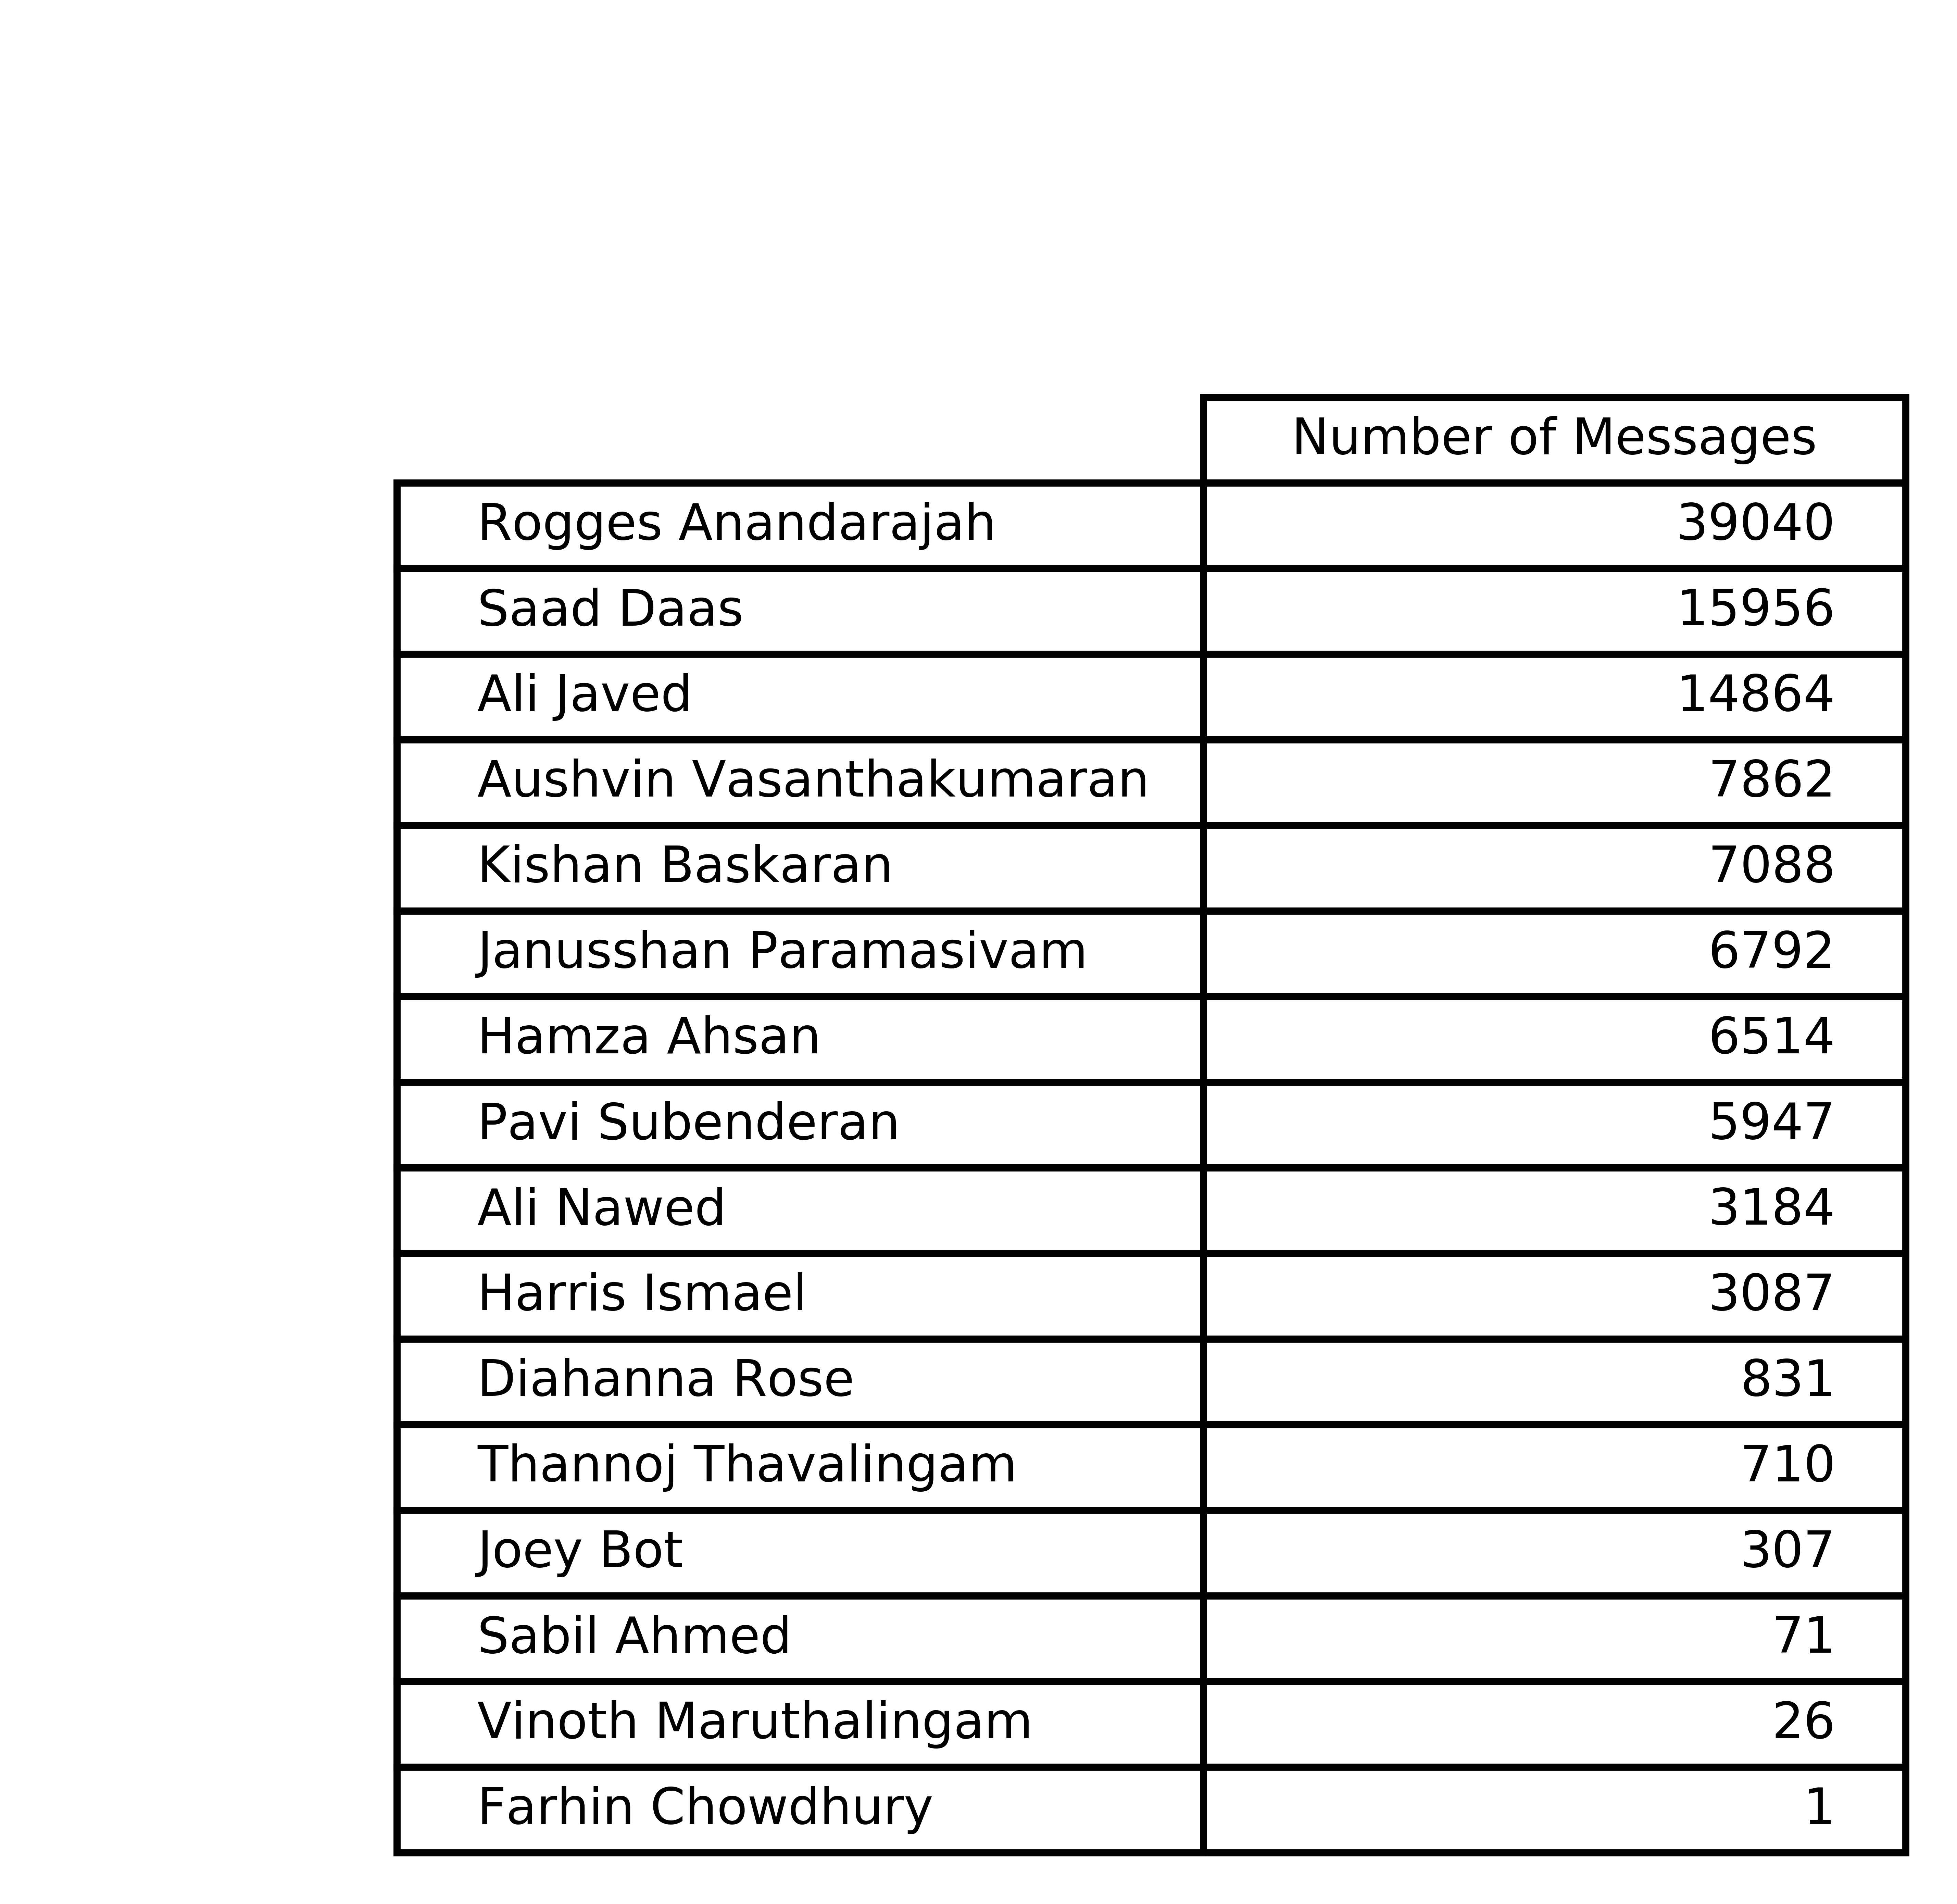

In [41]:
message_quantity_table = pd.DataFrame.from_dict(data = person_message_amount, 
                                               orient = 'index')
message_quantity_table.rename(columns = {message_quantity_table.columns[0]: "Number of Messages"},
                             inplace = True)

message_quantity_table.sort_values(by = "Number of Messages",
                                  ascending = False, inplace = True)

plt.figure(dpi = 1500)
ax = plt.subplot(432, frame_on=False) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False) 

pd.tools.plotting.table(ax, message_quantity_table)
plt.show()


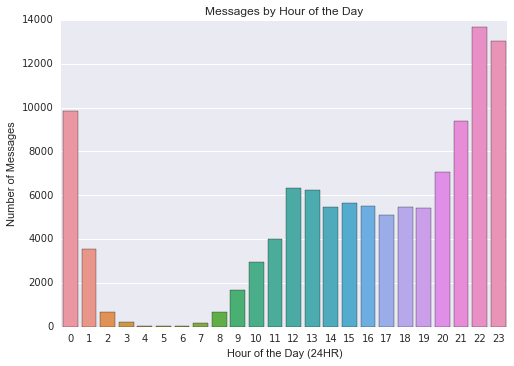

In [43]:
hourly_msgs_table = pd.DataFrame.from_dict(data = msgs_by_hour,
                      orient = 'index')
hourly_msgs_table.rename(columns = {hourly_msgs_table.columns[0]: "Number of Messages"},
                        inplace = True)

sns.barplot(y = hourly_msgs_table["Number of Messages"],
            x = list(hourly_msgs_table.index))

plt.ylabel("Number of Messages")
plt.xlabel("Hour of the Day (24HR)")
plt.title("Messages by Hour of the Day")
plt.show()


Swarmplot of message quantities by weekday. 

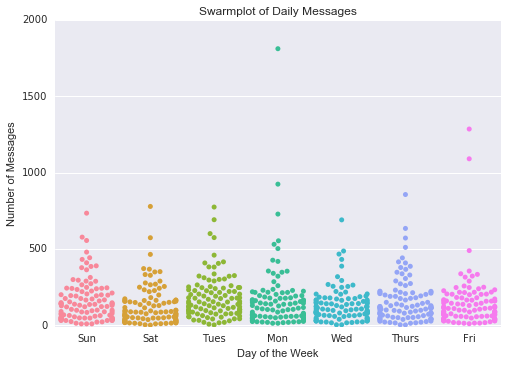

In [53]:
sns.swarmplot(x = "Day of the Week", y = "Number of Messages", data = daily_messages_dataframe)
plt.title("Swarmplot of Daily Messages")
plt.ylim([-10,2000])
plt.show()


In [75]:
sorted_average_response = sorted(average_response_time2.items(), key=op.itemgetter(1))

plt.figure(figsize=(20,10), dpi = 120)

bar = sns.barplot(y = [person[1] for person in sorted_average_response],
                  x = [person[0] for person in sorted_average_response])

plt.title("Time Spent Between Initiating Contact", size = 32)
plt.ylabel("Time (Hours)", size = 23)

plt.yticks(size = 20)
plt.xticks(size = 20)

plt.show()


In [82]:
sorted_average_response2 = sorted(average_response_time4.items(), key=op.itemgetter(1))

plt.figure(figsize=(20,10), dpi = 120)

sns.barplot(y = [person[1] for person in sorted_average_response2],
            x = [person[0] for person in sorted_average_response2])

plt.title("Time Between Responses to Previous Conversations", size = 32)
plt.ylabel("Time (Hours)", size = 23)

plt.yticks(size = 20)
plt.xticks(size = 20)

plt.show()


This concludes the majority of the processing for the group infographic. Comment polarity and contraction expansion was left to the NLP notebook.